# 2. Minimum example

This notebook shows the minimum code of the whole workflow.
It is the essential version of [1. Basic Usage](./1_basic.ipynb).
I think this is not practical because if you just want clean, you can use real data set and softwares like CASA.
Nevertheless, it may be useful to overview the whole part of this simulator.

I also show you the power of clean algorithm.
In this example, complicated structure is observed and restored!

In [1]:
import sys
import matplotlib.pyplot as plt
import cv2 as cv
sys.path.append('..')
from CLEAN import CLEAN

In [2]:
# User configurations

imagefile = '../image/structure.png'  # true target image
maskfile = '../image/structure_mask.png'  # mask image
N_antennas = 20  # number of antennas

In [3]:
clean = CLEAN()  # CLEAN class
antenna_pos, uv_coverage = clean.set_antenna_array(geometry='random', n_antennas=N_antennas, b_min=0.01)
vis, imsize = clean.create_visibility(imagefile=imagefile)

PSF created.


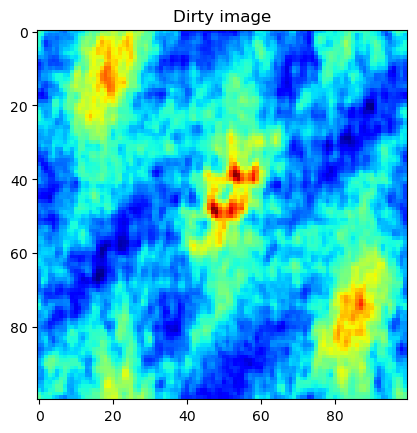

In [4]:
# Dirty image
_, _, _, dirty_image = clean.clean(vis=vis, imsize=imsize, weighting='uniform', n_iter=0, mask=maskfile)

fig, ax = plt.subplots()
im = ax.imshow(dirty_image, cmap='jet')
ax.set_title('Dirty image')
plt.show()

PSF created.
Iteration 22738: Peak value 9.997784754293753e-06 is below threshold 1e-05. Stopping the iteration.


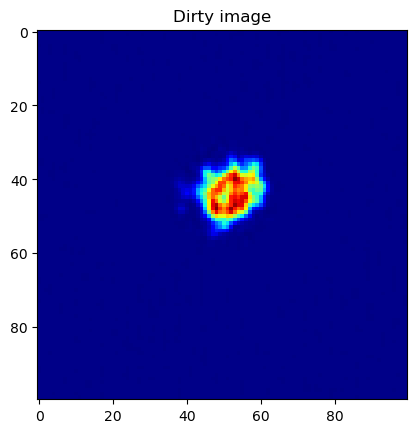

In [5]:
# Clean
threshold = 1e-5
n_iter = 100000
psf, _, _, clean_image = clean.clean(vis=vis, imsize=imsize, weighting='uniform', n_iter=n_iter, threshold=threshold, mask=maskfile)

fig, ax = plt.subplots()
im = ax.imshow(clean_image, cmap='jet')
ax.set_title('Dirty image')
plt.show()

Finally, let us check the true and ideal (observed with single dish with the diameter is equal to the longest baseline) intensity distribution of target

Text(0.5, 1.0, 'Ideal intensity distribution')

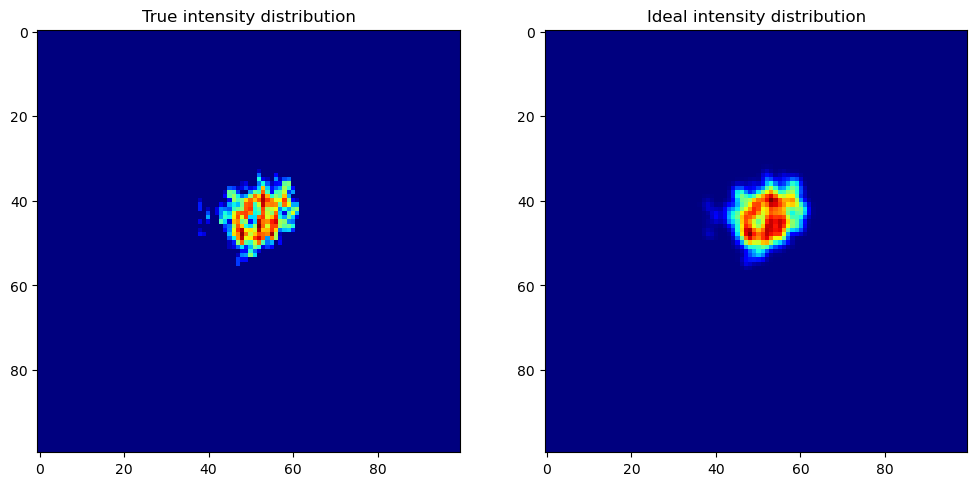

In [6]:
true_image = cv.imread('../image/structure.png', cv.IMREAD_GRAYSCALE).astype(float)
ideal_image = clean.get_synthesized_beamed_image(true_image, psf)
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(true_image, cmap='jet')
axs[0].set_title('True intensity distribution')
axs[1].imshow(ideal_image, cmap='jet')
axs[1].set_title('Ideal intensity distribution')